In [99]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage, exp_cov
from pypfopt import plotting

import pandas as pd
import numpy as np

In [78]:
df = pd.read_csv("Watchlist.csv")
df = df.set_index("date")

In [95]:
stocks = df.iloc[:,:8]

In [108]:
stocks = stocks.iloc[::-1]

## Using Exponential Covariance Matrix As the Risk Model

In [109]:
mu = mean_historical_return(stocks)
exp_cov_matrix = exp_cov(stocks, frequency = 100)

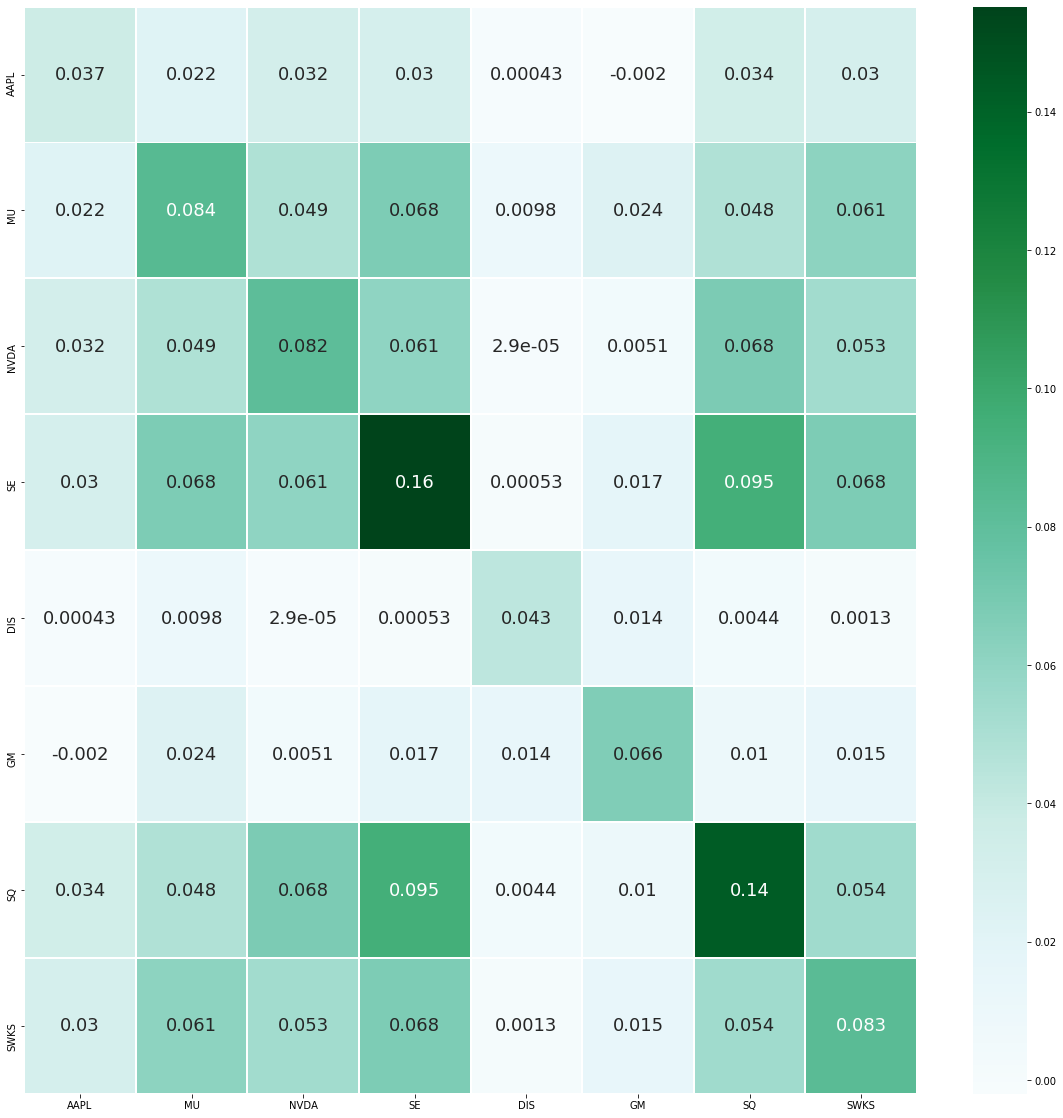

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))

sns.heatmap(data = exp_cov_matrix, fmt = '0.2', annot_kws = {"size": 18}, annot  = True, cmap = "BuGn", linewidths = 1)

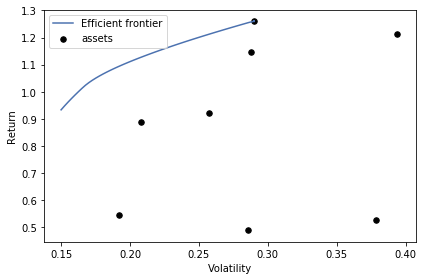

In [112]:
ef = EfficientFrontier(mu, exp_cov_matrix)

risk_range = np.linspace(0.15, 0.40, 100)
plotting.plot_efficient_frontier(ef, ef_param="risk", ef_param_range=risk_range,
                                show_assets=True, showfig=True)

In [113]:
ef = EfficientFrontier(mu, exp_cov_matrix)
weights = ef.max_sharpe(risk_free_rate=0.015)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

OrderedDict([('AAPL', 0.15097), ('MU', 0.08644), ('NVDA', 0.0), ('SE', 0.03618), ('DIS', 0.40563), ('GM', 0.17646), ('SQ', 0.0), ('SWKS', 0.14432)])


In [114]:
ef.portfolio_performance(verbose=True)

Expected annual return: 92.4%
Annual volatility: 14.8%
Sharpe Ratio: 6.13


C:\Users\nicho\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:407: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  UserWarning,


(0.924138572259513, 0.14841940637886428, 6.125469670312461)

In [115]:
import pypfopt

In [143]:
ef = EfficientFrontier(mu, exp_cov_matrix)
ef.add_objective(pypfopt.objective_functions.L2_reg, gamma=0.3)
weights = ef.max_sharpe(risk_free_rate=0.016)
cleaned_weights = ef.clean_weights()
print(cleaned_weights)

OrderedDict([('AAPL', 0.08747), ('MU', 0.19263), ('NVDA', 0.02075), ('SE', 0.14935), ('DIS', 0.19894), ('GM', 0.17278), ('SQ', 0.00642), ('SWKS', 0.17166)])


C:\Users\nicho\anaconda3\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:248: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  "max_sharpe transforms the optimization problem so additional objectives may not work as expected."


In [144]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [145]:
latest_prices = get_latest_prices(df)

In [146]:
allocation, leftover = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 10000).greedy_portfolio()

In [147]:
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'DIS': 13, 'MU': 30, 'GM': 38, 'SWKS': 12, 'SE': 8, 'AAPL': 7, 'NVDA': 1}
Funds remaining: $39.21
